### Дифференциальные уравнения в частных производных
Рассмотрим несколько расчетов на примерах различной реализации решения уравнения Лапласа.

#### Уравнение Лапласа

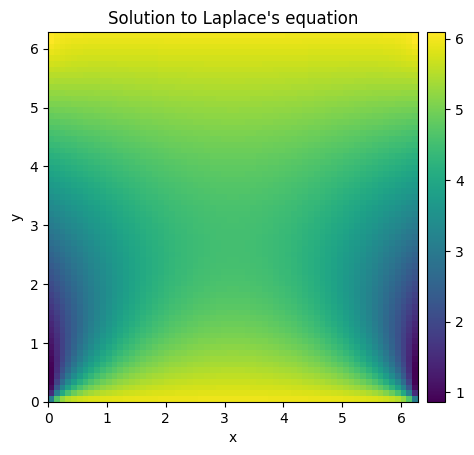

In [1]:
# Уравнение Лапласа: Решение при помощи библиотек
import numpy as np
from pde import CartesianGrid, solve_laplace_equation

grid = CartesianGrid([[0, 2 * np.pi]] * 2, 64)
bcs = [{"value": "sin(y)"}, {"value": "sin(x)"}]
bcs = [{"value": "y"}, {"value": "6"}]

res = solve_laplace_equation(grid, bcs)
res.plot()


Please wait for a moment
Iteration finished


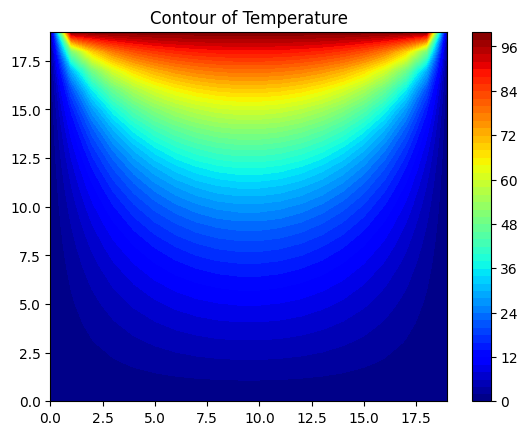

In [2]:
# Решение в конечных разностях
import numpy as np
import matplotlib.pyplot as plt

maxIter = 500
lenX = lenY = 20 
delta = 1

# Boundary condition
Ttop = 100
Tbottom = 0
Tleft = 0
Tright = 0

Tguess = 30
colorinterpolation = 50
colourMap = plt.cm.jet

X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
T = np.empty((lenX, lenY))
T.fill(Tguess)

T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

print("Please wait for a moment")
for iteration in range(0, maxIter):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

print("Iteration finished")

plt.title("Contour of Temperature")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()


Please wait for a moment
Iteration finished


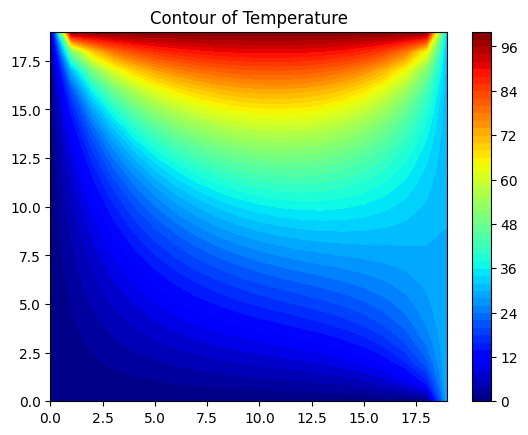

In [3]:
# Решение в конечных разностях: 2й вариант
import numpy as np
import matplotlib.pyplot as plt

maxIter = 500
lenX = lenY = 20 #we set it rectangular
delta = 1
Ttop = 100
Tbottom = 0
Tleft = 0
Tright = 30
Tguess = 30

colorinterpolation = 50
colourMap = plt.cm.jet # colourMap = plt.cm.coolwarm

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
T = np.empty((lenX, lenY))
T.fill(Tguess)
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft
print("Please wait for a moment")
for iteration in range(0, maxIter):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

print("Iteration finished")
plt.title("Contour of Temperature")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()
